# ĐỒ ÁN MÔN LẬP TRÌNH PHÂN TÍCH DỮ LIỆU
## Thành viên nhóm 1:
- _Trần Văn Hùng, MSSV: 20029141_
- _Vũ Văn Hưng, MSSV: 20036941_
- _Phạm Anh Chiến, MSSV: 20045061_
- _Viên Vĩ Nghiệp, MSSV:_
- _Đinh Dương Bảo, MSSV: 20028461_
## Giảng viên:
<br>
- _Thầy Trương Vĩnh Linh_

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

## Thông tin bộ dữ liệu: 
- Dữ liệu về các chỉ số cơ bản của cầu thủ giải đấu ngoại hạng Anh (Premire League).
- Nguồn thu thập: footystats.org.
- Thời gian thu thập: từ ngày 10/11 tới 22/11.

- Lý do thu thập: nhóm muốn tổng hợp lại thống số thi đấu của các cầu thủ đã tham gia giải bóng đá premier league một cách cụ thể và chính xác nhất.

### Thông tin cụ thể:

   - Data là thông số thi đấu của các cầu thủ ngoại hạng Anh trong thời gian tham dự giải Premire League mùa giải 2018-2019.

   - Vì chỉ tổng kết lại thông số thi đấu nên data sẽ ko chứa thông tin cá nhân của từng cầu thủ, cũng như thông tin về clb mà họ đang thi đấu.

- Data thuộc nhóm dữ liệu định lượng có nhiều giá trị.

In [3]:
data= pd.read_csv('Premier League Player Stats.csv')
data

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59
...,...,...,...,...,...,...,...,...,...,...
535,536,Dennis Cirkin,Tottenham Hotspur,0,0,0,0,0,0,0
536,537,Darnell Johnson,Leicester City,0,0,0,0,0,0,0
537,538,Timothy Fosu-Mensah,Manchester United,3,2,136,0,0,1,0
538,539,Conor Coventry,West Ham United,0,0,0,0,0,0,0


In [36]:
data_explained = {'Tên cột': ['Rank', 'PLAYER', 'TEAM', 'GP', 'GS', 'MIN', 'G', 'ASST', 'SHOTS', 'SOG'],
        'Mô tả': ['Thứ hạng của cầu thủ', 'Tên cầu thủ', 'Tên câu lạc bộ', 'Số trận đấu tham gia', 
                  'Số trận có mặt trong đội hình xuất phát', 'Thời gian thi đấu trên sân', 
                  'Số bàn thắng đã ghi được trong mùa giải', 'Số lần kiến tạo trong mùa giải', 
                  'Tổng số lần shot', 'Số lần shot vào goal']}
df = pd.DataFrame(data_explained)
df

,Tên cột,Mô tả
0,Rank,Thứ hạng của cầu thủ
1,PLAYER,Tên cầu thủ
2,TEAM,Tên câu lạc bộ
3,GP,Số trận đấu tham gia
4,GS,Số trận có mặt trong đội hình xuất phát
5,MIN,Thời gian thi đấu trên sân
6,G,Số bàn thắng đã ghi được trong mùa giải
7,ASST,Số lần kiến tạo trong mùa giải
8,SHOTS,Tổng số lần shot
9,SOG,Số lần shot vào goal


## Code và chi tiết bài làm: 
### Dash 1: Dữ liệu về thời gian chơi của cầu thủ giải đấu Premier League

In [1]:
# import các thư viện cần thiết
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('Premier League Player Stats.csv') # đọc data
app = dash.Dash() # tạo dash app

# Tạo layout mặc định dash app:
app.layout = html.Div(children=[
    html.H1(children='Premier League Player Stat (Minute Played)'), # Tên của dash
    html.Label(['Đội tuyển bạn đang chọn:'], style={'font-weight': 'bold', "text-align": "center"}), # Đặt tên cho dropdown
    dcc.Dropdown(id='team-dropdown', # Thêm dropdown checklist với đội tuyển mặc định là Manchester United
                 options=[{'label': i, 'value': i}
                         for i in data['TEAM'].unique()],
                value='Manchester United'),
    html.P('Select Minute Played:', className = 'fix_label', style = {'color': 'white', 'margin-left': '1%'}),
            html.Label(['Kéo để lọc cầu thủ theo thời gian chơi:'], style={'font-weight': 'bold', "text-align": "center"}),
            dcc.RangeSlider(id = 'select-min', # Thêm range slider với giá trị mặc định là 0-600 min
                            min = 0, # giá trị tối thiểu
                            max = 3050, # giá trị tối đa
                            dots = False,
                            allowCross=False,
                            pushable=2, # thêm tuỳ chọn giá trị trước đẩy giá trị sau
                            value = [0, 600]), # giá trị ban đầu
    dcc.Graph(id='player-graph')
])
"""
Tạo callback với input là đội tuyển và thời gian chơi được người dùng chọn từ dropdown checklist và range slider.
Với output là trả về giao diện mới của dash app.

"""
@app.callback(
    Output(component_id='player-graph', component_property='figure'),
    [Input(component_id='team-dropdown', component_property='value'), 
    Input(component_id='select-min', component_property='value')]
)

# Sau khi truyền vào input mới, tạo hàm cập nhật layout mới của dash app

def update_graph(selected_team, selected_min): # Truyền vào 2 dữ liệu là đội tuyển và khoảng thời gian mà người dùng chọn
    filter_data_min = data[(data['MIN'] >= selected_min[0])&(data['MIN']<=selected_min[1])] # Lọc data để phù hợp với lựa chọn
    filter_data_team = filter_data_min[data['TEAM'] == selected_team]
    
    line_fig = px.bar(filter_data_team, x='PLAYER', y='MIN') # Vẽ biểu đồ với 2 dữ liệu mới được cập nhật
    return line_fig

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\Users\kurus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


(-0.5, 1869.5, 941.5, -0.5)

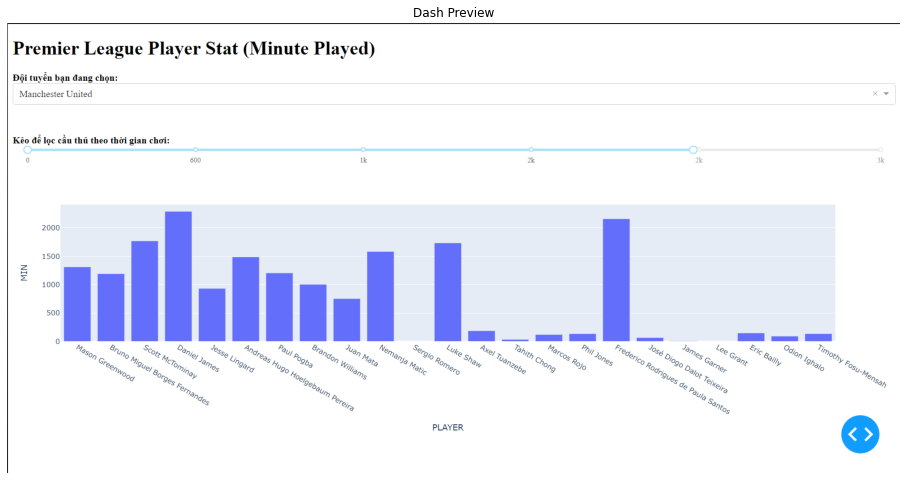

In [1]:
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
img = cv2.imread('min.png')
plt.imshow(img[:,:,::-1]); plt.title('Dash Preview'); plt.axis('off')

In [ ]:
data = pd.read_csv('Premier League Player Stats.csv') # đọc data
app = dash.Dash() # tạo dash app

# Tạo layout mặc định dash app:
app.layout = html.Div(children=[
    html.H1(children='Premier League Player Stat (Performance)'), # Tên của dash
    html.Label(['Đội tuyển bạn đang chọn:'], style={'font-weight': 'bold', "text-align": "center"}), # Đặt tên cho dropdown
    dcc.Dropdown(id='team-dropdown', # Thêm dropdown checklist với đội tuyển mặc định là Manchester United
                 options=[{'label': i, 'value': i}
                         for i in data['TEAM'].unique()],
                value='Manchester United'),
    html.P('Select Minute Played:', className = 'fix_label', style = {'color': 'white', 'margin-left': '1%'}),
            html.Label(['Kéo để lọc cầu thủ theo thời gian chơi:'], style={'font-weight': 'bold', "text-align": "center"}),
            dcc.RangeSlider(id = 'select-min', # Thêm range slider với giá trị mặc định là 0-600 min
                            min = 0, # giá trị tối thiểu
                            max = 3050, # giá trị tối đa
                            dots = False,
                            allowCross=False,
                            pushable=2, # thêm tuỳ chọn giá trị trước đẩy giá trị sau
                            value = [0, 600]), # giá trị ban đầu
    dcc.Graph(id='player-graph')
])
"""
Tạo callback với input là đội tuyển và thời gian chơi được người dùng chọn từ dropdown checklist và range slider.
Với output là trả về giao diện mới của dash app.

"""
@app.callback(
    Output(component_id='player-graph', component_property='figure'),
    [Input(component_id='team-dropdown', component_property='value'), 
    Input(component_id='select-min', component_property='value')]
)

# Sau khi truyền vào input mới, tạo hàm cập nhật layout mới của dash app

def update_graph(selected_team, selected_min): # Truyền vào 2 dữ liệu là đội tuyển và khoảng thời gian mà người dùng chọn
    filter_data_min = data[(data['MIN'] >= selected_min[0])&(data['MIN']<=selected_min[1])] # Lọc data để phù hợp với lựa chọn
    filter_data_team = filter_data_min[data['TEAM'] == selected_team]
    
    fig = px.line(filter_data_team, x='PLAYER', y=['G', 'ASST', 'SHOTS', 'SOG']) # Vẽ biểu đồ với 2 dữ liệu mới được cập nhật
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

(-0.5, 1870.5, 937.5, -0.5)

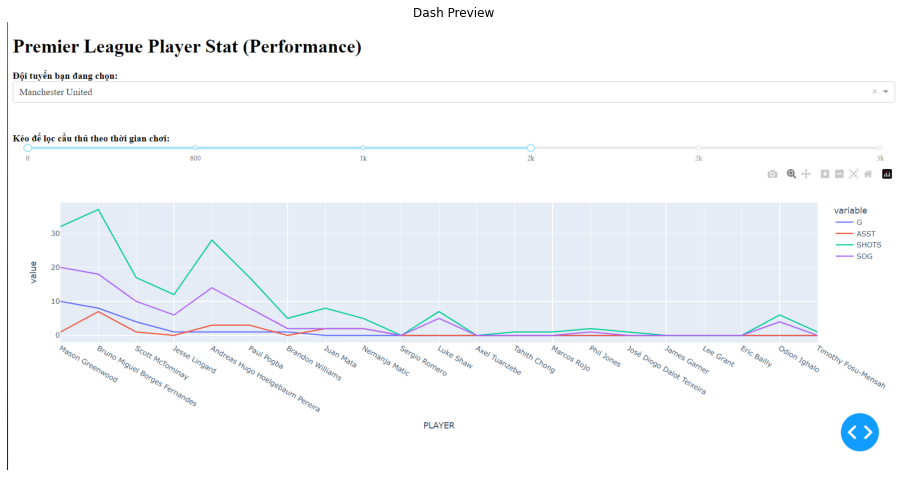

In [2]:
img2 = cv2.imread('stat.png')
plt.imshow(img2[:,:,::-1]); plt.title('Dash Preview'); plt.axis('off')